In [1]:
import pandas as pd

train_df = pd.read_csv("dev_anon_split/r2_lu_train_statements.csv", sep=';')
test_df = pd.read_csv("dev_anon_split/r2_lu_test_statements.csv", sep=';')

train_df = train_df[['Text', 'Polarity']]
test_df = test_df[['Text', 'Polarity']]

display(train_df)
display(test_df)


,Text,Polarity
0,Claro que e. Eles são todos 17. Protesto! Pers...,for
1,"Não entendo o uso das delações ""só contra quem...",for
2,"Vai procurar o que fazer mulher, deixa nosso P...",against
3,Chora não bebe. Os petistas tem o Bandido do L...,against
4,"Vocês não sabem de nada, essa peste de Lula e ...",against
...,...,...
6235,"Hei Jornaleco! São rápidos para postar as ""fra...",against
6236,Lula acaba de ser ABSOLVIDO em seu processo ma...,for
6237,As promessas de campanha do Bozonaro lembra as...,against
6238,Eita Jornaleco! Camilo Santana fez uma bondade...,against


,Text,Polarity
0,"PTQP, não sei nem como ele se elegeu com quase...",against
1,"Não sei neste governo, mas nos anteriores com ...",against
2,Deixa duas coisas muito claras: 1- qual é o ra...,for
3,Chego em casa e recebo a notícia que o Lula tá...,for
4,Está precisando ficar em uma clinica de recupe...,against
...,...,...
2075,"Ninguém tem q ser simpatizante do Lula, mas te...",for
2076,acho que Lula não é mais ladrao que os polític...,for
2077,"Extra extra, Lula esta livre para derrubar as ...",for
2078,Duvido que essa senhora não pronuncie o nome d...,against


In [2]:
print("\nPolarity distribution in training set:")
print(train_df['Polarity'].value_counts())

print("\nPolarity distribution in test set:") 
print(test_df['Polarity'].value_counts())


Polarity distribution in training set:
Polarity
against    3385
for        2855
Name: count, dtype: int64

Polarity distribution in test set:
Polarity
against    1129
for         951
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Polarity'])
test_df['label'] = label_encoder.transform(test_df['Polarity'])

label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label2id = {k: str(v) for k, v in label2id.items()}
id2label = {v: str(k) for k, v in label2id.items()}
display(train_df)
display(test_df)
display(label2id)
display(id2label)

,Text,Polarity,label
0,Claro que e. Eles são todos 17. Protesto! Pers...,for,1
1,"Não entendo o uso das delações ""só contra quem...",for,1
2,"Vai procurar o que fazer mulher, deixa nosso P...",against,0
3,Chora não bebe. Os petistas tem o Bandido do L...,against,0
4,"Vocês não sabem de nada, essa peste de Lula e ...",against,0
...,...,...,...
6235,"Hei Jornaleco! São rápidos para postar as ""fra...",against,0
6236,Lula acaba de ser ABSOLVIDO em seu processo ma...,for,1
6237,As promessas de campanha do Bozonaro lembra as...,against,0
6238,Eita Jornaleco! Camilo Santana fez uma bondade...,against,0


,Text,Polarity,label
0,"PTQP, não sei nem como ele se elegeu com quase...",against,0
1,"Não sei neste governo, mas nos anteriores com ...",against,0
2,Deixa duas coisas muito claras: 1- qual é o ra...,for,1
3,Chego em casa e recebo a notícia que o Lula tá...,for,1
4,Está precisando ficar em uma clinica de recupe...,against,0
...,...,...,...
2075,"Ninguém tem q ser simpatizante do Lula, mas te...",for,1
2076,acho que Lula não é mais ladrao que os polític...,for,1
2077,"Extra extra, Lula esta livre para derrubar as ...",for,1
2078,Duvido que essa senhora não pronuncie o nome d...,against,0


{'against': '0', 'for': '1'}

{'0': 'against', '1': 'for'}

/home/aluisioamorim/Code/ModernBERTbr/modernBERTbr/.venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train token length stats:
count    6240.000000
mean       35.889423
std        20.264320
min         2.000000
25%        19.000000
50%        32.000000
75%        52.000000
max       120.000000
Name: Text, dtype: float64

Test token length stats:
count    2080.000000
mean       36.202404
std        20.630767
min         3.000000
25%        20.000000
50%        32.000000
75%        53.000000
max       126.000000
Name: Text, dtype: float64

Suggested max_length (95th percentile): 71


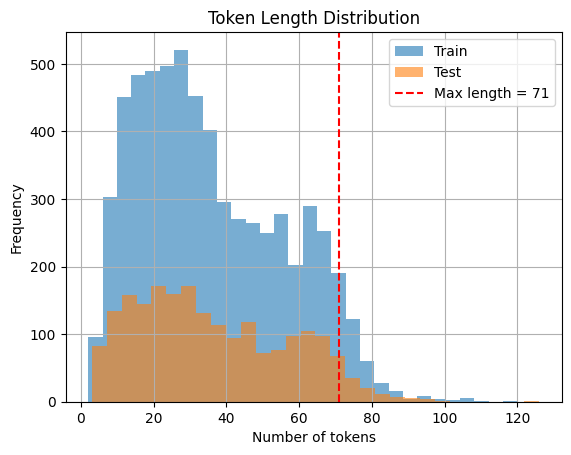

In [4]:
from datasets import Dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

train_dataset = Dataset.from_pandas(train_df[['Text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['Text', 'label']])

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

train_token_lengths = train_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))
test_token_lengths = test_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))

print("Train token length stats:")
print(train_token_lengths.describe())
print("\nTest token length stats:")
print(test_token_lengths.describe())

suggested_max_len = int(train_token_lengths.quantile(0.95))
print(f"\nSuggested max_length (95th percentile): {suggested_max_len}")

plt.hist(train_token_lengths, bins=30, alpha=0.6, label='Train')
plt.hist(test_token_lengths, bins=30, alpha=0.6, label='Test')
plt.axvline(suggested_max_len, color='red', linestyle='--', label=f'Max length = {suggested_max_len}')
plt.title("Token Length Distribution")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def tokenize_function(example):
    return tokenizer(example['Text'], truncation=True, padding='max_length', max_length=74)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 2080/2080 [00:00<00:00, 39688.97 examples/s]


In [6]:
from transformers.models.modernbert import ModernBertForSequenceClassification

model = ModernBertForSequenceClassification.from_pretrained(
    './modernbert-br/checkpoint-60000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at ./modernbert-br/checkpoint-60000 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1303355/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.730800
20,0.741100
30,0.688700
40,0.654900
50,0.680600
60,0.662600
70,0.637000
80,0.657600
90,0.638600
100,0.657100


TrainOutput(global_step=294, training_loss=0.601297376918144, metrics={'train_runtime': 74.8669, 'train_samples_per_second': 250.044, 'train_steps_per_second': 3.927, 'total_flos': 921962947127040.0, 'train_loss': 0.601297376918144, 'epoch': 3.0})

In [8]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.6534

Classification Report:
              precision    recall  f1-score   support

     against       0.66      0.74      0.70      1129
         for       0.64      0.56      0.59       951

    accuracy                           0.65      2080
   macro avg       0.65      0.65      0.65      2080
weighted avg       0.65      0.65      0.65      2080



In [9]:
from transformers.models.bert import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    './bert-br/checkpoint-75000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./bert-br/checkpoint-75000 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1303355/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.694200
20,0.660700
30,0.633000
40,0.581000
50,0.570200
60,0.516000
70,0.540600
80,0.512400
90,0.495700
100,0.543100


TrainOutput(global_step=294, training_loss=0.44528511713962166, metrics={'train_runtime': 52.7787, 'train_samples_per_second': 354.689, 'train_steps_per_second': 5.57, 'total_flos': 711879849158400.0, 'train_loss': 0.44528511713962166, 'epoch': 3.0})

In [11]:
# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.7784

Classification Report:
              precision    recall  f1-score   support

     against       0.79      0.81      0.80      1129
         for       0.77      0.74      0.75       951

    accuracy                           0.78      2080
   macro avg       0.78      0.78      0.78      2080
weighted avg       0.78      0.78      0.78      2080

